In this program, we are going to test several models to see which is best for a categorical dataset.

In [3]:
# Import libraries.
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Load the dataset and split into training (75%) and test (25%) sets.
from sklearn.datasets import load_digits
df = load_digits()
X = df.data
y = df.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#Normalizing the features
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

1.) Train Logistic Regression model on the dataset and print the accuracy of the model using the score method.

In [5]:
#Fitting Logistic Regression to Training Set
from sklearn.linear_model import LogisticRegression
classifierObj = LogisticRegression(random_state=0, multi_class = 'auto')
classifierObj.fit(X_train, y_train)

#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test)

#Evaluating the predictions using Accuracy Score method
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test, y_pred)
print('Logistic Regression Accuracy Score =', a)

Logistic Regression Accuracy Score = 0.9622222222222222


C:\Users\16123\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


2.) Train SVM with linear kernel and print the accuracy of the model.

In [6]:
#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.svm import SVC
classifierObj = SVC(kernel = 'linear')
classifierObj.fit(X_train, y_train)


#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test)

#Evaluating the predictions using Accuracy Score method
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test, y_pred)
print('SVM Linear kernel Accuracy Score =',a)

SVM Linear kernel Accuracy Score = 0.9733333333333334


3.) For the SVM with poly kernel, we will write a loop trying different values of degree and train to find the kernel with the best accuracy. Also, we'll plot a graph and analyze the trend.
    * What value of degree gives you the best accuracy?

degree = 1 , Accuracy Score = 0.98
degree = 2 , Accuracy Score = 0.9822222222222222
degree = 3 , Accuracy Score = 0.9488888888888889


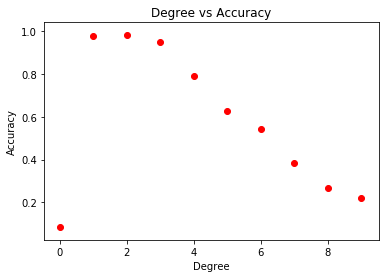

In [7]:
for degree in range(10): 
    scores = []
    
    #Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
    from sklearn.svm import SVC
    model = classifierObj = SVC(kernel = 'poly', degree = degree, gamma = 'auto')
    classifierObj.fit(X_train, y_train)


    #Making predictions on the Test Set
    y_pred = classifierObj.predict(X_test)

    #Evaluating the predictions using Accuracy Score method
    from sklearn.metrics import accuracy_score
    accuracy = accuracy_score(y_test, y_pred)
    scores.append(accuracy)
    
    if accuracy >= 0.8:
        print('degree =', degree, ', Accuracy Score =', accuracy)
        
    #Plot degree vs accuracy score
    plt.scatter(degree, scores, color = 'red')
    plt.title('Degree vs Accuracy')
    plt.xlabel('Degree')
    plt.ylabel('Accuracy')
plt.show()

The first three degrees gives you accuracy above 90%. Degree 2 gives you the best accuracy of 98.2%, then degree 1 of 98.0% and finally degree 3 gives you accuracy of 94.8%. Degree 4 and greater gives you decreasing accuracy. As degree increases, accuracy decreases.

4.) Train SVM with RBF kernel and print the accuracy of the model.

In [8]:
#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.svm import SVC
classifierObj = SVC(kernel = 'rbf', gamma = 'auto')
classifierObj.fit(X_train, y_train)


#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test)

#Evaluating the predictions using Accuracy Score method
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test, y_pred)
print('SVM with RBF kernel Accuracy Score =',a)

SVM with RBF kernel Accuracy Score = 0.9844444444444445


5.) For the classification using k-NN, we will write a loop trying different values of k and we'll plot a graph to analyze the trend.
    * What value of k gives you the best accuracy?

k = 1 ,  Accuracy Score = 0.9733333333333334
k = 3 ,  Accuracy Score = 0.9711111111111111
k = 5 ,  Accuracy Score = 0.9733333333333334


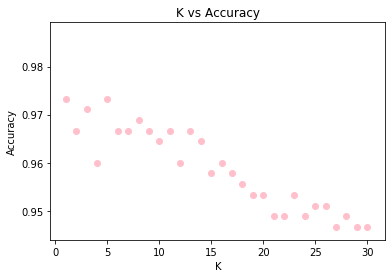

In [9]:
for k in range(1,31):
    scores = []
    
    #Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
    from sklearn.neighbors import KNeighborsClassifier
    classifierObj = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')
    classifierObj.fit(X_train, y_train)

    #Making predictions on the Test Set
    y_pred = classifierObj.predict(X_test)

    #Evaluating the predictions using Accuracy Score method
    from sklearn.metrics import accuracy_score
    a = accuracy_score(y_test, y_pred)
    scores.append(a)
    
    if a >= 0.97:
        print('k =', k,',  Accuracy Score =',a)
    
    plt.scatter(k, scores, color = 'pink')
    plt.title('K vs Accuracy')
    plt.xlabel('K')
    plt.ylabel('Accuracy')

plt.show()

k = 1 and 5 gives the best accuracy of 97.3%. According to the graph, as k increases, accuracy decreases.

6.) Train Naive Bays Model and print the accuracy of the model.

In [10]:
#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.naive_bayes import GaussianNB
classifierObj = GaussianNB()
classifierObj.fit(X_train, y_train)


#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test)

#Evaluating the predictions using Accuracy Score method
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test, y_pred)
print('Naive Bayes Accuracy Score =', a)

Naive Bayes Accuracy Score = 0.7733333333333333


7.) Train Decision Tree and print the accuracy of the model.

In [11]:
#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.tree import DecisionTreeClassifier
classifierObj = DecisionTreeClassifier(criterion='entropy')
classifierObj.fit(X_train,y_train)

#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test)

#Evaluating the predictions using Accuracy Score method
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test, y_pred)
print('Decision Tree Accuracy Score =', a)

Decision Tree Accuracy Score = 0.8488888888888889


8.) For the Random Forest, we will write a loop trying different values of n_esitmators plot a graph to analyze the trend.
    * What values of n_estimators gives you the best accuracy?

estimator = 72 , Random Forest Accuracy Score = 0.9822222222222222
estimator = 73 , Random Forest Accuracy Score = 0.9822222222222222
estimator = 77 , Random Forest Accuracy Score = 0.9822222222222222
estimator = 78 , Random Forest Accuracy Score = 0.9822222222222222


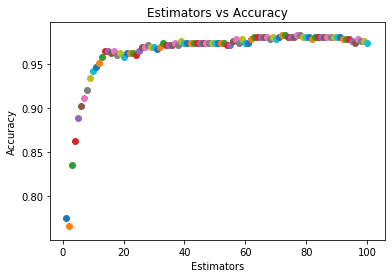

In [12]:
for estimator in range(1,101):
    scores = []

    #Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
    from sklearn.ensemble import RandomForestClassifier
    classifierObj = RandomForestClassifier(n_estimators = estimator, random_state = 0)
    classifierObj.fit(X_train,y_train)

    #Making predictions on the Test Set
    y_pred = classifierObj.predict(X_test)

    #Evaluating the predictions using Accuracy Score method
    from sklearn.metrics import accuracy_score
    a = accuracy_score(y_test, y_pred)
    scores.append(a)
    
    if a >= 0.982:
        print('estimator =', estimator,', Random Forest Accuracy Score =', a)
        
    plt.scatter(estimator, scores)
    plt.title('Estimators vs Accuracy')
    plt.xlabel('Estimators')
    plt.ylabel('Accuracy')
    
plt.show()

You can have an inifinite number of estimators, but for the purpose of this demonstration I chose a range of 100 estimators. For this range, the best estimators are 72, 73, 77 and 78 all with a 98.2% accuracy. According to the graph, the more estimators you have, the more likely you will get more accuracy, however accuracy plateau after certain amount of estimators.

Here are the best accuracy for each model:
* Logistic Regression = 0.9622222222222222
* SVM with linear kernel = 0.9733333333333334
* SVM with poly kernel = 0.9822222222222222
* SVM with rbf kernerl = 0.9844444444444445
* k-NN = 0.9733333333333334
* Naive Bayes = 0.7733333333333333
* Decision Tree Classification = 0.8488888888888889
* Random Forest Classification = 0.9822222222222222

When comparing the accuracy scores of all the models, SVM with rbf kernel produced the highest accuracy score for this dataset.